<a href="https://colab.research.google.com/github/yonatandn/IDL/blob/main/Assignment1_group_57.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [ ]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [ ]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Explanation:
# Since most of the songs of an artist have similar music style, it could be argued that splitting a single artist's songs into both 
# training and testing might lead to an over-confident result as the model might recognize the artist and immidietly classify the song into the dominant century
# of the artist. The result is that song's century being classified according on the artist.

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [ ]:
# Explanation:
# The splitting between training and testing is "artificial" - the testing is supposed to represent the model's performence on new unknown data.
# Thus, the only "known" parameters are the training parameters - the testing parameters are pretented to be hidden. 

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Explanation:
# We should limit how many times we use the test data, as we do not want to adjust the model specificly according to the test data (overfitting) because it would not allow us to examine
# the accuracy and performance of our model later.
# In order to validate a specific model structure (and specifically - the hyperparameters) we take a small portion of the training set - namely the "validation" set.
 

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  threshold = 10**-8
  return -t * np.log(y + threshold) - (1 - t) * np.log(1 - y + threshold)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  y = sigmoid(np.dot(w, X.T) + b)
  return y

pred(np.zeros(90), 1, np.ones([2, 90]))

array([0.73105858, 0.73105858])

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  dLdw = np.dot((y-t),X) / len(X)
  dLdb = np.mean(y-t)
  return (dLdw, dLdb)

# **Explenation on Gradients**




**``An explaination on how the gradients are computed``**:

Consider a batch of $N$ training datapoints which is composed of samples and their corresponding lables, i.e. $\boldsymbol{\mathcal D_i} = \{(\boldsymbol{x}_n, t_n)\}^{N}_{n=1} \subset \boldsymbol{\mathcal D_t}$.

The predicted label of $\boldsymbol{x}_n \in \mathbb{R}^{m}$ is given by -  
$$\hat{y}_n = \sigma({\boldsymbol w}^T {\boldsymbol x}_n + b)$$

Where $\sigma : \mathbb{R}^{m} \rightarrow (0,1)$ is the sigmoid function.

The corss entropy loss of this batch is given by the following expression-

$$\mathcal L_{\theta}(\boldsymbol t, \boldsymbol{\hat{y}}) = CE(\boldsymbol t, \boldsymbol{\hat{y}}) = \frac{1}{N}\sum_{n=1}^{N} \left[ -t_n \cdot log(\hat{y}_n)  - (1 - t_n) \cdot log(1 - \hat{y}_n) \right]$$

Where $\theta = \{\boldsymbol w, b\}$ are the objective parameters, i.e. the weights. 

The following derivation aims to extract nice and compact derivative expressions of $\mathcal L_{\theta}$ with respect to its objective parameters.

**1. Derivation of $\frac{\partial \mathcal{L}_{\theta}}{\partial b}$ :**

$$\frac{\partial \mathcal{L}_{\theta}}{\partial b} = 
\frac{1}{N}\sum_{n=1}^{N} \left[ -t_n \cdot \frac{\partial log(\hat{y}_n)}{\partial b}  - (1 - t_n) \cdot \frac{\partial log(1 - \hat{y}_n)}{\partial b} \right]$$

We begin with the chain rule, to break down the derivative dependecies -

$$ \frac{\partial log(\hat{y}_n)}{\partial b} = \frac{\partial log(\hat{y}_n)}{\partial \hat{y}_n} \cdot
\frac{\partial \hat{y}_n}{\partial z_n} \cdot \frac{\partial z_n}{\partial b}$$

Where $z_n = {\boldsymbol w}^T {\boldsymbol x}_n + b$. The next step is writing the derivative terms explicitly -

$$ \frac{\partial log(\hat{y}_n)}{\partial \hat{y}_n} = \frac{1}{\hat{y}_n}$$

$$ \frac{\partial z_n}{\partial b} = 1$$

In order to get an explicit term of $\frac{\partial \hat{y}_n}{\partial z_n}$, we will use an auxiliary equation derivation:

-----------------------------------------------
**Auxiliary Statement: Derivative of sigmoid function**

$$\frac{d \sigma(z)}{dz} = \frac{d}{dz}\frac{1}{1 + e^{-z}} = \frac{-\frac{d}{dz}(1 + e^{-z})}{(1 + e^{-z})^2} = \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} = \frac{1}{1 + e^{-z}} \cdot \frac{(1 + e^{-z}) - 1}{1 + e^{-z}} = \frac{1}{1 + e^{-z}} \cdot \left(\frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}}\right) = \frac{1}{1 + e^{-z}} \cdot \left(1 - \frac{1}{1 + e^{-z}}\right) = \sigma(z) \cdot \left(1 - \sigma(z) \right)$$

----------------------------------

Therefore it holds that-

$$ \frac{\partial \hat{y}_n}{\partial z_n} = \frac{d\sigma(z_n)}{d z_n} = \sigma(z_n) \cdot \left(1 - \sigma(z_n) \right) = \hat{y}_n \cdot \left(1 - \hat{y}_n \right)$$

Composing all together, we get-

$$ \frac{\partial log(\hat{y}_n)}{\partial b} = \frac{\partial log(\hat{y}_n)}{\partial \hat{y}_n} \cdot
\frac{\partial \hat{y}_n}{\partial z_n} \cdot \frac{\partial z_n}{\partial b} = \frac{1}{\hat{y}_n} \cdot \hat{y}_n \cdot \left(1 - \hat{y}_n \right) \cdot 1 = 1 - \hat{y}_n$$

$$ \frac{\partial log(1 - \hat{y}_n)}{\partial b} = \frac{\partial log(1 - \hat{y}_n)}{\partial \hat{y}_n} \cdot
\frac{\partial \hat{y}_n}{\partial z_n} \cdot \frac{\partial z_n}{\partial b} = \frac{-1}{1 - \hat{y}_n} \cdot \hat{y}_n \cdot \left(1 - \hat{y}_n \right) \cdot 1 = - \hat{y}_n$$

Using these expressions, we get that the partial derivative $\frac{\partial \mathcal{L}_{\theta}}{\partial b}$ is-

$$\frac{\partial \mathcal{L}_{\theta}}{\partial b} = 
\frac{1}{N}\sum_{n=1}^{N} \left[ -t_n \cdot \left(1 - \hat{y}_n \right) + (1 - t_n) \cdot \hat{y}_n  \right]
= \frac{1}{N}\sum_{n=1}^{N} \left[\hat{y}_n -t_n\right]$$


**2. Derivation of $\frac{\partial \mathcal{L}_{\theta}}{\partial {\boldsymbol w}}$ :**

Now, we have to get a nice expression of -

$$\frac{\partial \mathcal{L}_{\theta}}{\partial w_i} = 
\frac{1}{N}\sum_{n=1}^{N} \left[ -t_n \cdot \frac{\partial log(\hat{y}_n)}{\partial w_i}  - (1 - t_n) \cdot \frac{\partial log(1 - \hat{y}_n)}{\partial w_i} \right]$$

Again, we break down the general derivative term with the chain rule -

$$ \frac{\partial log(\hat{y}_n)}{\partial w_i} = \frac{\partial log(\hat{y}_n)}{\partial \hat{y}_n} \cdot
\frac{\partial \hat{y}_n}{\partial z_n} \cdot \frac{\partial z_n}{\partial w_i}$$

Only the last term has been changed comparing to the derivative by $b$, lets find it now-

$$\frac{\partial z_n}{\partial w_i} = \frac{\partial\left({\boldsymbol w}^T {\boldsymbol x}_n + b\right)}{\partial w_i} = x_n^{(i)}$$

Putting all together, we get-

$$ \frac{\partial log(\hat{y}_n)}{\partial \boldsymbol w} = \frac{\partial log(\hat{y}_n)}{\partial \hat{y}_n} \cdot
\frac{\partial \hat{y}_n}{\partial z_n} \cdot \frac{\partial z_n}{\partial \boldsymbol w} = \frac{1}{\hat{y}_n} \cdot \hat{y}_n \cdot \left(1 - \hat{y}_n \right) \cdot \boldsymbol{x}_n = \left(1 - \hat{y}_n \right) \cdot \boldsymbol{x}_n$$

$$ \frac{\partial log(1 - \hat{y}_n)}{\partial \boldsymbol w} = \frac{\partial log(1 - \hat{y}_n)}{\partial \hat{y}_n} \cdot
\frac{\partial \hat{y}_n}{\partial z_n} \cdot \frac{\partial z_n}{\partial \boldsymbol w} = \frac{-1}{1 - \hat{y}_n} \cdot \hat{y}_n \cdot \left(1 - \hat{y}_n \right) \cdot 1 = - \hat{y}_n \cdot \boldsymbol{x}_n$$

Using these expressions, we get that the partial derivative $\frac{\partial \mathcal{L}_{\theta}}{\partial \boldsymbol w}$ is-

$$\frac{\partial \mathcal{L}_{\theta}}{\partial \boldsymbol w} = 
\frac{1}{N}\sum_{n=1}^{N} \left[ -t_n \cdot \left(1 - \hat{y}_n \right) \cdot \boldsymbol{x}_n + (1 - t_n) \cdot \hat{y}_n \cdot \boldsymbol{x}_n \right]
= \frac{1}{N}\sum_{n=1}^{N} \left[\left(\hat{y}_n -t_n\right)\cdot \boldsymbol{x}_n\right]
=\frac{1}{N} \cdot
\left[\begin{array}{cc} 
| &   & |\\
\boldsymbol{x}_1 & \cdot\cdot\cdot &\boldsymbol{x}_N\\
| &   & |\\
\end{array}\right] \cdot
\left[\begin{array}{cc} 
\hat{y}_1 -t_1\\ 
\vdots \\
\hat{y}_N -t_N \\
\end{array}\right]
$$ 

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [ ]:
# Your code goes here
N = 90
M = 1
w = np.random.randn(N)
b = np.random.randn(M)
t = np.round(np.random.random(M))
X = np.random.randn(M, N)
h = 0.00000001

y_b_plus_h = pred(w, b + h, X) 
y_b_ = pred(w, b, X)
y_b = pred(w, b, X)

r1 = derivative_cost(X, y_b, t)
r2 = ((cross_entropy(t, y_b_plus_h) - cross_entropy(t, y_b_)) / h)[0]
error = np.sum((r1[1] - r2) ** 2)

print("The analytical results is -", r1[1])
print("The algorithm results is - ", r2)
print("the MSE in dLdb: ", error)

The analytical results is - -0.0001041207825315249
The algorithm results is -  -0.0001041053501000741
the MSE in dLdb:  2.3815994048368486e-16


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [ ]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

N = 90
M = 1
w = np.random.randn(N)
b = np.random.randn(M)
t = np.round(np.random.random(M))
X = np.random.randn(M, N)
h = 0.000001

# Analytical derivative 
y_w = pred(w, b, X)
r1 = derivative_cost(X, y_w, t)

# Numerical derivative 
eps = np.eye(N) * h
w_tile = np.tile(w, (N, 1))
w_plus_h = w_tile + eps
y_w_ = pred(w, b, X)
y_w_plus_h = pred(w_plus_h[0], b, X)
r2 = np.zeros(N)

for i in range(N):
    y_w_plus_h = pred(w_plus_h[i], b, X)
    r2[i] = (cross_entropy(t, y_w_plus_h) - cross_entropy(t, y_w_)) / h

print("The analytical results is -", r1[0])
print("The algorithm results is - ", r2)

# error = np.transpose(r2) - np.transpose(r1[0])
error = np.sum((r1[0] - r2) ** 2)
print("the MSE in the derivative :", error)

The analytical results is - [ 0.82726972 -0.66230709  0.25820897 -1.92980575  1.09529574  0.19762516
  0.29857044 -1.38824009  1.01463334  1.44972645 -0.75347518  0.22327019
 -1.14655618 -1.6912748   0.74728249  0.71521807  1.96038417 -0.23089127
 -0.44537754 -1.03115872  1.07904223  0.17337235  0.29581535  0.09057069
  1.18948366  1.08508526 -0.03067308 -2.62277022  1.15771782 -1.79495528
  0.48264408  0.28309505 -0.10468104 -0.47972916  0.75352883 -0.74153987
  0.50460298  1.33686457 -1.23589018 -0.40108464  1.08551031  0.34270424
 -1.7371821   0.35242195  2.21184114  1.19299147 -0.62329051  0.0613587
  0.03790642  0.76473113 -1.12605376 -1.65709006  1.24068025  0.11510897
  1.86137747 -0.11740348  1.2005525   0.43542239  2.07693958 -0.57452805
  1.16523358  2.04951735  0.15638526 -0.76694317 -1.81831666 -1.34067065
  0.11692267 -0.36365263 -1.10595748  1.02506437 -0.80874401  0.33794113
  0.7843659   1.18650104 -0.50864935 -0.5120924  -0.22697816  0.59285405
  0.40576617  1.06261681

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0, mu=0.1, batch_size=100, max_iters=100):
  w = w0
  b = b0
  iter = 0
  train_cost_arr = []
  train_acc_arr = []
  
  val_cost_arr = []
  val_acc_arr = []

  X_val = val_norm_xs
  t_val = val_ts.squeeze()

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    # iterate over each minibatch
    for i in range(0, len(train_norm_xs), batch_size):
      # minibatch that we are working with for training:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w, b, X)

      # compute costs and append to lists
      train_cost = cost(y, t)
      train_cost_arr.append(train_cost)

      # compute accuracy and append to lists
      train_acc = get_accuracy(y, t)
      train_acc_arr.append(train_acc)

      # validation calculations
      y_val = pred(w, b, X_val)

      val_cost = cost(y_val, t_val)
      val_cost_arr.append(val_cost)
      val_acc = get_accuracy(y_val, t_val)
      val_acc_arr.append(val_acc)

      # update w and b
      dLdw, dLdb = derivative_cost(X, y, t)
      w = w - mu * dLdw
      b = b - mu * dLdb
        
      # increment the iteration count
      iter += 1

      # print the *validation* loss and accuracy
      if iter % 10 == 0:
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (iter, val_acc * 100, val_cost))
    
      if iter >= max_iters:
        break
  
  return w, b, train_cost_arr, train_acc_arr, val_cost_arr, val_acc_arr

### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
mu_arr = [0.01, 0.1, 1, 5]
batch_size = 100 
max_iters = 100
val_acc = []
val_cost = []

index = -1
for mu in mu_arr:
  index += 1
  w, b, costs, accs, val_cost_tmp, val_acc_tmp = run_gradient_descent(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0, mu, batch_size, max_iters)
  val_acc.append(val_acc_tmp)
  val_cost.append(val_cost_tmp)



Iter 10. [Val Acc 52%, Loss 2.856784]
Iter 20. [Val Acc 52%, Loss 2.832289]
Iter 30. [Val Acc 52%, Loss 2.809152]
Iter 40. [Val Acc 52%, Loss 2.787986]
Iter 50. [Val Acc 52%, Loss 2.763330]
Iter 60. [Val Acc 52%, Loss 2.739893]
Iter 70. [Val Acc 52%, Loss 2.717298]
Iter 80. [Val Acc 52%, Loss 2.694195]
Iter 90. [Val Acc 52%, Loss 2.674377]
Iter 100. [Val Acc 52%, Loss 2.653272]
Iter 10. [Val Acc 52%, Loss 2.664209]
Iter 20. [Val Acc 53%, Loss 2.498457]
Iter 30. [Val Acc 53%, Loss 2.332489]
Iter 40. [Val Acc 54%, Loss 2.151900]
Iter 50. [Val Acc 55%, Loss 1.999708]
Iter 60. [Val Acc 56%, Loss 1.882810]
Iter 70. [Val Acc 57%, Loss 1.767562]
Iter 80. [Val Acc 57%, Loss 1.667827]
Iter 90. [Val Acc 58%, Loss 1.561525]
Iter 100. [Val Acc 59%, Loss 1.479818]
Iter 10. [Val Acc 56%, Loss 1.775514]
Iter 20. [Val Acc 61%, Loss 1.176912]
Iter 30. [Val Acc 66%, Loss 0.929776]
Iter 40. [Val Acc 66%, Loss 0.796828]
Iter 50. [Val Acc 68%, Loss 0.710858]
Iter 60. [Val Acc 65%, Loss 0.870308]
Iter 70. [

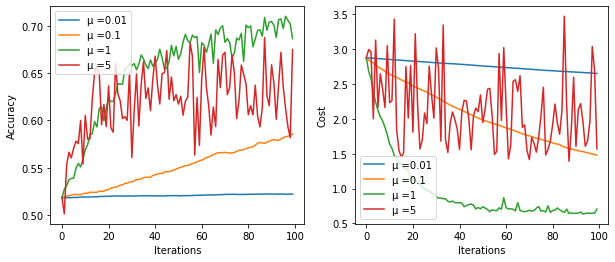

In [ ]:
fig, (cost_fig, accuracy_fig) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

iter_axis = range(0, len(val_acc[0]))

cost_fig.plot(iter_axis, val_acc[0], iter_axis, val_acc[1], iter_axis, val_acc[2], iter_axis, val_acc[3])
cost_fig.set_xlabel('Iterations')
cost_fig.set_ylabel('Accuracy')
cost_fig.legend(['\u03BC =' + str(mu_arr[0]), '\u03BC =' + str(mu_arr[1]), '\u03BC =' + str(mu_arr[2]), '\u03BC =' + str(mu_arr[3])])

accuracy_fig.plot(iter_axis, val_cost[0], iter_axis, val_cost[1], iter_axis, val_cost[2], iter_axis, val_cost[3])
accuracy_fig.set_xlabel('Iterations')
accuracy_fig.set_ylabel('Cost')
accuracy_fig.legend(['\u03BC =' + str(mu_arr[0]), '\u03BC =' + str(mu_arr[1]), '\u03BC =' + str(mu_arr[2]), '\u03BC =' + str(mu_arr[3])])
plt.show()

**Explain and discuss your results here:**


We can see that when the step size mu is too small (0.01) the accuracy is not improving during the iterations.
as a result the cost function stays relativly high.
when the step size mu is too large (5) the cost function does not converge, it has big oscillations- the model dosn't find the local minimum of the cost function.
In between, we can see that for mu = 0.1 the results are better then the 0.01 but still not fast enough to converge.
For mu=1 the accuracy is graduly increaing while the loss function sets on a local minimum.  

 

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

In [ ]:
# Hyperparameters Grid Search (Criterion: Maximum Accuracy)

w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

mu_start = 0.2
mu_end = 5
mu_res = 0.4
mu_vec = np.arange(mu_start, mu_end, mu_res)

batch_start = 50
batch_end = 500
batch_res = 50
batch_vec = np.arange(batch_start, batch_end, batch_res)
acc_mat = np.zeros([mu_vec.shape[0],batch_vec.shape[0]])
opt_acc = 0
b_opt = b0
w_opt = w0
curr_val_acc = 0 

for mu in enumerate(mu_vec):
    for batch in enumerate(batch_vec):
      w, b, train_cost_arr, train_acc_arr, val_cost_arr_iter, val_acc_arr_iter = run_gradient_descent(train_norm_xs[:100000],train_ts[:100000],
                                                val_norm_xs[:3000],val_ts[:3000],w0, b0, mu=mu[1], batch_size=batch[1], max_iters=100)
      curr_val_acc = val_acc_arr_iter[-1]
        
      if curr_val_acc > opt_acc:
        opt_acc = curr_val_acc
        opt_cost = val_cost_arr_iter[-1]
        b_opt = b
        w_opt = w
        mu_opt = mu[1]
        batch_opt = batch[1]
            
      acc_mat[mu[0],batch[0]] = curr_val_acc

print('optimal cost = ',opt_cost, ', optimal accuracy = ', opt_acc, ', optimal mu = ', mu_opt, ', optimal batch = ', batch_opt)
print('optimal b = ', b_opt, ', optimal w = ', w_opt)


Iter 10. [Val Acc 49%, Loss 3.069969]
Iter 20. [Val Acc 51%, Loss 2.691297]
Iter 30. [Val Acc 52%, Loss 2.449990]
Iter 40. [Val Acc 52%, Loss 2.187037]
Iter 50. [Val Acc 55%, Loss 1.906310]
Iter 60. [Val Acc 56%, Loss 1.731245]
Iter 70. [Val Acc 57%, Loss 1.539944]
Iter 80. [Val Acc 58%, Loss 1.406498]
Iter 90. [Val Acc 58%, Loss 1.325422]
Iter 100. [Val Acc 60%, Loss 1.194919]
Iter 10. [Val Acc 49%, Loss 3.075241]
Iter 20. [Val Acc 50%, Loss 2.660870]
Iter 30. [Val Acc 51%, Loss 2.352241]
Iter 40. [Val Acc 52%, Loss 2.113538]
Iter 50. [Val Acc 54%, Loss 1.906134]
Iter 60. [Val Acc 56%, Loss 1.719008]
Iter 70. [Val Acc 57%, Loss 1.544259]
Iter 80. [Val Acc 58%, Loss 1.404947]
Iter 90. [Val Acc 59%, Loss 1.273066]
Iter 100. [Val Acc 60%, Loss 1.170344]
Iter 10. [Val Acc 49%, Loss 3.062444]
Iter 20. [Val Acc 51%, Loss 2.666759]
Iter 30. [Val Acc 52%, Loss 2.334590]
Iter 40. [Val Acc 53%, Loss 2.079000]
Iter 50. [Val Acc 55%, Loss 1.839531]
Iter 60. [Val Acc 56%, Loss 1.649323]
Iter 70. [

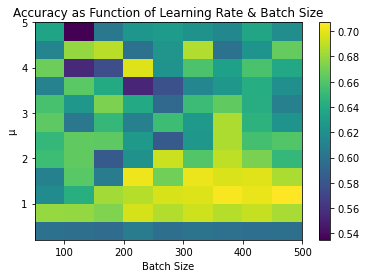

In [ ]:
plt.pcolormesh(np.arange(batch_start, batch_end+batch_res, batch_res), np.arange(mu_start, mu_end+mu_res, mu_res),acc_mat)
plt.title("Accuracy as Function of Learning Rate & Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("μ")
plt.colorbar();

**Explain and discuss your results here:**




As we can see, the optimals mu and batch size are between 1-2 and 300-500 respectivly.

We can see another good result at  mu=4 and batch size=250, it is an expremental result and could be a coincident.

### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here

train_acc = get_accuracy(pred(w_opt,b_opt,train_norm_xs), train_ts)*100
val_acc = get_accuracy(pred(w_opt,b_opt,val_norm_xs), val_ts)*100
test_acc = get_accuracy(pred(w_opt,b_opt,test_norm_xs), test_ts)*100

print('train_acc = {:.4f}%\t val_acc = {:.4f}%\t test_acc = {:.4f}%'.format(train_acc, val_acc, test_acc))


train_acc = 71.5746%	 val_acc = 71.0040%	 test_acc = 70.9801%


**Explain and discuss your results here:**


As expected, the train has the highest accuracy because the model fitts the weights according to the train data.
The validatin data is used to find the optimal hyperparameters which affects the model.
The test is the only data that the model have not seen before and did not adjust to it.

The test accuracy is very close to the train and validation accuracy which shows that the model is robust and dosn't overfit to the training and validation data.

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(train_norm_xs, np.squeeze(train_ts))

# In order to achieve the model accuracy, we can use either the exsisted function `get_accuracy` or method model.score

# Using exsisted function `get_accuracy`
train_acc = get_accuracy(model.predict(train_norm_xs), train_ts)*100
val_acc = get_accuracy(model.predict(val_norm_xs), val_ts)*100
test_acc = get_accuracy(model.predict(test_norm_xs), test_ts)*100

# Using method model.score
train_acc1 = model.score(train_norm_xs, train_ts)*100
val_acc1 = model.score(val_norm_xs, val_ts)*100
test_acc1 = model.score(test_norm_xs, test_ts)*100

print('Using get_accuracy:\ttrain_acc = {:.4f}%\t val_acc = {:.4f}%\t test_acc = {:.4f}%'.format(train_acc, val_acc, test_acc))
print('Using model.score:\ttrain_acc = {:.4f}%\t val_acc = {:.4f}%\t test_acc = {:.4f}%'.format(train_acc1, val_acc1, test_acc1))



Using get_accuracy:	train_acc = 73.2942%	 val_acc = 73.3540%	 test_acc = 72.6980%
Using model.score:	train_acc = 73.2942%	 val_acc = 73.3540%	 test_acc = 72.6980%


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
